# Loading Libraries

In [1]:
import os
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


2024-05-23 05:09:12.057398: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 05:09:12.057487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 05:09:12.269078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Function to see the files present in the directories

In [2]:
def show_files(directory_path):
    # List all directories inside the main directory
    directories = os.listdir(directory_path)

    # Iterate through each directory
    for folder in directories:
        # Construct the full path of the current directory
        folder_path = os.path.join(directory_path, folder)

        # Check if the current item is a directory
        if os.path.isdir(folder_path):
            # Count the number of files in the directory
            file_count = len(os.listdir(folder_path))
            print(folder_path)
            print(f"Folder '{folder}' contains {file_count} files.")



In [3]:
train_path= '/kaggle/input/indian-birds/Birds_25/train'
valid_path =  '/kaggle/input/indian-birds/Birds_25/valid'

In [4]:
show_files(train_path)

/kaggle/input/indian-birds/Birds_25/train/Common-Rosefinch
Folder 'Common-Rosefinch' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Asian-Green-Bee-Eater
Folder 'Asian-Green-Bee-Eater' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Common-Kingfisher
Folder 'Common-Kingfisher' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Jungle-Babbler
Folder 'Jungle-Babbler' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/White-Wagtail
Folder 'White-Wagtail' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Indian-Roller
Folder 'Indian-Roller' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Brown-Headed-Barbet
Folder 'Brown-Headed-Barbet' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Common-Tailorbird
Folder 'Common-Tailorbird' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Rufous-Treepie
Folder 'Rufous-Treepie' contains 1200 files.
/kaggle/input/indian-birds/Birds_25/train/Whit

In [5]:
show_files(valid_path)

/kaggle/input/indian-birds/Birds_25/valid/Common-Rosefinch
Folder 'Common-Rosefinch' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Asian-Green-Bee-Eater
Folder 'Asian-Green-Bee-Eater' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Common-Kingfisher
Folder 'Common-Kingfisher' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Jungle-Babbler
Folder 'Jungle-Babbler' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/White-Wagtail
Folder 'White-Wagtail' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Indian-Roller
Folder 'Indian-Roller' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Brown-Headed-Barbet
Folder 'Brown-Headed-Barbet' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Common-Tailorbird
Folder 'Common-Tailorbird' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/Rufous-Treepie
Folder 'Rufous-Treepie' contains 300 files.
/kaggle/input/indian-birds/Birds_25/valid/White-Breaste

# Plotting Graphs

In [7]:
import matplotlib.pyplot as plt

def plot_graph(history):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns

    # Plot training & validation accuracy values
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()


# Loading Datasets

In [8]:

# Define paths
train_dir = '/kaggle/input/indian-birds/Birds_25/train'
validation_dir = '/kaggle/input/indian-birds/Birds_25/valid'

# Parameters
batch_size = 32
img_height = 150
img_width = 150

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
    


# Print class names to verify
class_names = train_ds.class_names
print(class_names)


Found 30000 files belonging to 25 classes.
Found 7500 files belonging to 25 classes.
['Asian-Green-Bee-Eater', 'Brown-Headed-Barbet', 'Cattle-Egret', 'Common-Kingfisher', 'Common-Myna', 'Common-Rosefinch', 'Common-Tailorbird', 'Coppersmith-Barbet', 'Forest-Wagtail', 'Gray-Wagtail', 'Hoopoe', 'House-Crow', 'Indian-Grey-Hornbill', 'Indian-Peacock', 'Indian-Pitta', 'Indian-Roller', 'Jungle-Babbler', 'Northern-Lapwing', 'Red-Wattled-Lapwing', 'Ruddy-Shelduck', 'Rufous-Treepie', 'Sarus-Crane', 'White-Breasted-Kingfisher', 'White-Breasted-Waterhen', 'White-Wagtail']


# Check whether the data is loaded properly or not

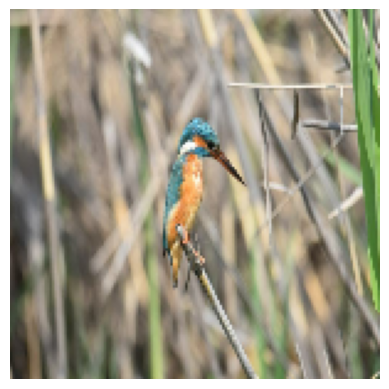

3


In [9]:
import matplotlib.pyplot as plt
import numpy as np


# Get a batch of images and labels
for images, labels in train_ds.take(1):
    first_image = images[3].numpy().astype("uint8")
    first_label = labels[3].numpy()

plt.imshow(first_image)
plt.axis('off')  # Hide the axis
plt.show()
print(first_label)

# Normalize the dataset

In [10]:
# Normalize the datasets
normalization_layer = layers.Rescaling(1./255)

normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))




# Model Building 
# CNN

In [45]:
from tensorflow.keras.layers import Conv2D , BatchNormalization, MaxPooling2D

In [50]:
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(len(class_names), activation='softmax') 
          ])

# Compile the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_24 (Dropout)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_25 (Dropout)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 25)             │        12,825 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,049,433 (72.67 MB)

 Trainable params: 19,047,961 (72.66 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [51]:
cnn_history = cnn_model.fit(normalized_train_ds,validation_data = normalized_val_ds,epochs=10)

Epoch 1/10
  3/938 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.0677 - loss: 4.8202   

W0000 00:00:1716402031.999088     204 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.1807 - loss: 3.0500

W0000 00:00:1716402119.715756     203 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716402121.370352     204 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 125s 114ms/step - accuracy: 0.1808 - loss: 3.0496 - val_accuracy: 0.3568 - val_loss: 2.0746
Epoch 2/10


W0000 00:00:1716402138.942594     205 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 93s 98ms/step - accuracy: 0.4068 - loss: 1.9309 - val_accuracy: 0.5140 - val_loss: 1.5734
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 100ms/step - accuracy: 0.5127 - loss: 1.5575 - val_accuracy: 0.5300 - val_loss: 1.6429
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 102ms/step - accuracy: 0.5825 - loss: 1.3525 - val_accuracy: 0.5011 - val_loss: 1.7190
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.6624 - loss: 1.0678 - val_accuracy: 0.6456 - val_loss: 1.1557
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 97s 103ms/step - accuracy: 0.7429 - loss: 0.8108 - val_accuracy: 0.6621 - val_loss: 1.1142
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 101ms/step - accuracy: 0.7883 - loss: 0.6586 - val_accuracy: 0.6293 - val_loss: 1.3795
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 102ms/step - accuracy: 0.8390 - loss: 0.4824 - val_accuracy: 0.6851 - val_loss: 1.1166
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 98s 104ms/step - accuracy: 0.8749 - loss: 0.3754 - val

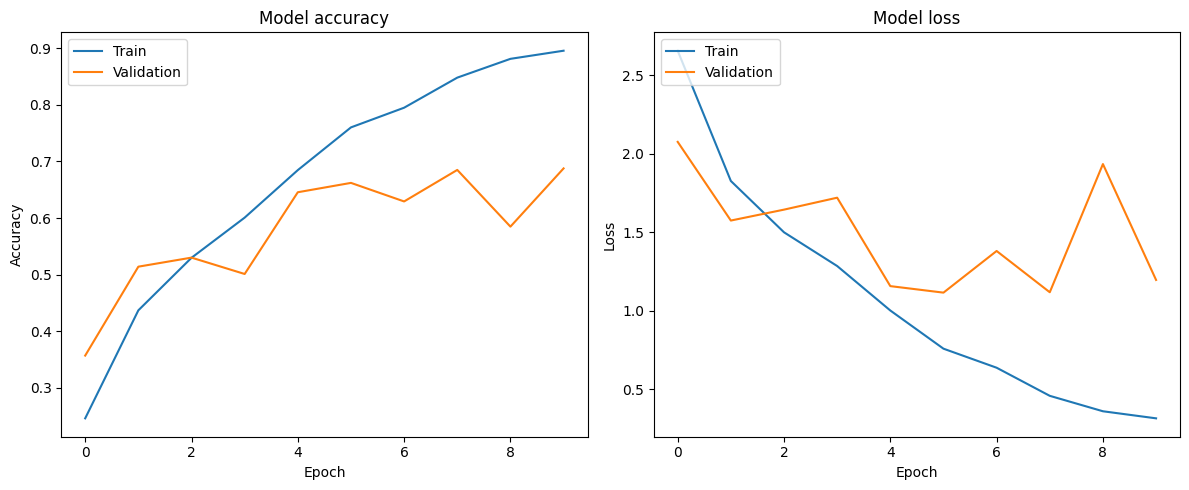

In [52]:
plot_graph(cnn_history)

# VGG16

In [35]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

# Load the pre-trained VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 15 
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
vgg_model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax') 
])

# Compile the model
vgg_model.compile(optimizer=RMSprop(learning_rate=1e-5),
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

# Summary of the model architecture
vgg_model.summary()

# Train the model
vgg_history = vgg_model.fit(normalized_train_ds,
                        epochs=8,
                        validation_data=normalized_val_ds)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 7,079,424 (27.01 MB)

 Non-trainable params: 7,635,264 (29.13 MB)

Epoch 1/8
  2/938 ━━━━━━━━━━━━━━━━━━━━ 1:35 102ms/step - accuracy: 0.0312 - loss: 3.8230    

W0000 00:00:1716445716.982709     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.1401 - loss: 3.0125

W0000 00:00:1716445793.824115     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716445795.486530     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 101s 103ms/step - accuracy: 0.1402 - loss: 3.0121 - val_accuracy: 0.5015 - val_loss: 1.7988
Epoch 2/8


W0000 00:00:1716445813.553566     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 100ms/step - accuracy: 0.4369 - loss: 1.8919 - val_accuracy: 0.6352 - val_loss: 1.2592
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.5753 - loss: 1.4111 - val_accuracy: 0.6985 - val_loss: 1.0119
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.6548 - loss: 1.1272 - val_accuracy: 0.7387 - val_loss: 0.8650
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.7109 - loss: 0.9482 - val_accuracy: 0.7699 - val_loss: 0.7620
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 101ms/step - accuracy: 0.7572 - loss: 0.8021 - val_accuracy: 0.7832 - val_loss: 0.7063
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 95s 100ms/step - accuracy: 0.7872 - loss: 0.6918 - val_accuracy: 0.7961 - val_loss: 0.6537
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 94s 100ms/step - accuracy: 0.8197 - loss: 0.5915 - val_accuracy: 0.8159 - val_loss: 0.5987


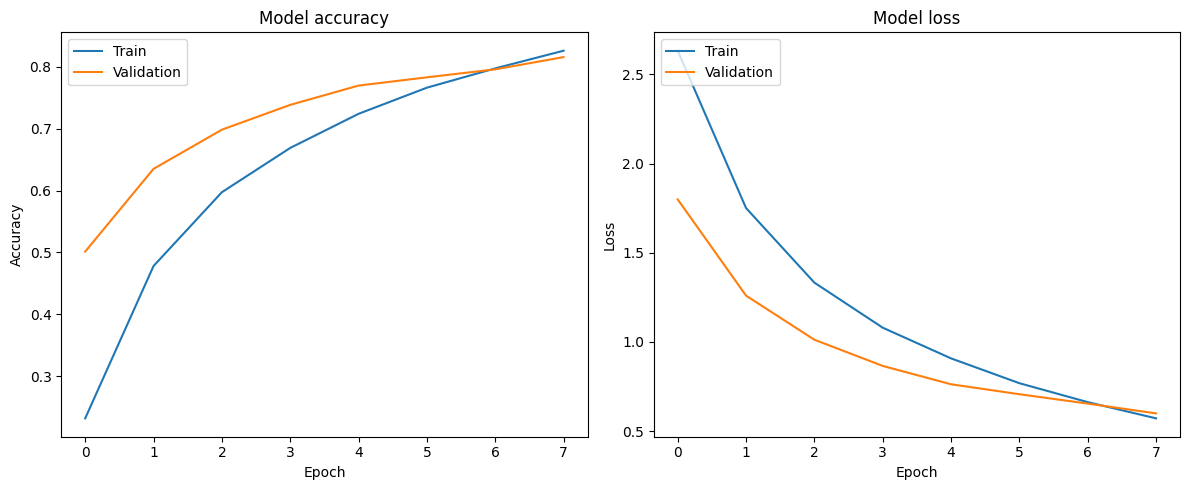

In [36]:
plot_graph(vgg_history)

# ResNet50

In [39]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 150  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
resnet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(class_names), activation='softmax')  
])

# Compile the model
resnet_model.compile(optimizer=RMSprop(learning_rate=1e-5),
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])

# Summary of the model architecture
resnet_model.summary()

# Train the model
resnet_history = resnet_model.fit(normalized_train_ds,
                        epochs=8,
                        validation_data=normalized_val_ds)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 9,990,144 (38.11 MB)

 Non-trainable params: 13,597,568 (51.87 MB)

Epoch 1/8
  2/938 ━━━━━━━━━━━━━━━━━━━━ 1:30 97ms/step - accuracy: 0.0625 - loss: 3.3200  

W0000 00:00:1716447225.309224     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.1252 - loss: 2.9848

W0000 00:00:1716447303.800161     111 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716447308.140424     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 117s 108ms/step - accuracy: 0.1253 - loss: 2.9846 - val_accuracy: 0.2483 - val_loss: 2.4918
Epoch 2/8


W0000 00:00:1716447326.531335     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.2450 - loss: 2.4870 - val_accuracy: 0.3108 - val_loss: 2.2733
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 90s 96ms/step - accuracy: 0.3075 - loss: 2.2744 - val_accuracy: 0.3285 - val_loss: 2.1738
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 97ms/step - accuracy: 0.3500 - loss: 2.1287 - val_accuracy: 0.3653 - val_loss: 2.0857
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 141s 96ms/step - accuracy: 0.3859 - loss: 1.9970 - val_accuracy: 0.3825 - val_loss: 2.0071
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.4298 - loss: 1.8744 - val_accuracy: 0.3984 - val_loss: 1.9723
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.4573 - loss: 1.7710 - val_accuracy: 0.4059 - val_loss: 1.9383
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.4940 - loss: 1.6663 - val_accuracy: 0.4109 - val_loss: 1.9183


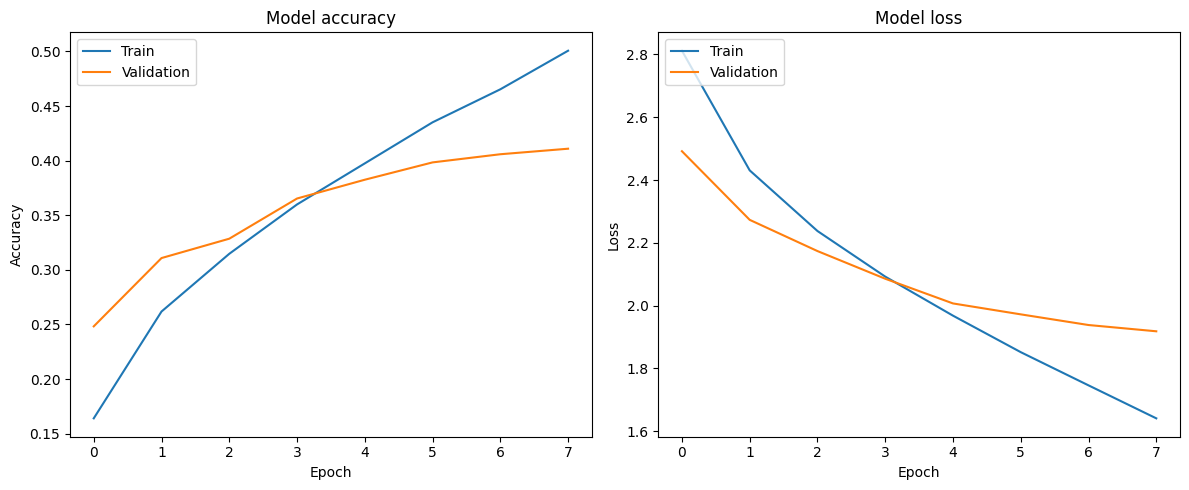

In [41]:
plot_graph(resnet_history)

# MobileNetV2

In [30]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import RMSprop


In [32]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 100
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
mobilenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(len(class_names), activation='sigmoid')
])

# Compile the model
mobilenet_model.compile(optimizer=RMSprop(learning_rate=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mobilenet_model.summary()


/tmp/ipykernel_34/1368170208.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_3      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 1,861,440 (7.10 MB)

 Non-trainable params: 396,544 (1.51 MB)

In [33]:
mobilenet_history = mobilenet_model.fit(normalized_train_ds,validation_data=normalized_val_ds,epochs=8)

Epoch 1/8
  3/938 ━━━━━━━━━━━━━━━━━━━━ 49s 53ms/step - accuracy: 0.0260 - loss: 3.6701     

W0000 00:00:1716444715.260014     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.2944 - loss: 2.5295

W0000 00:00:1716444795.838127     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716444799.891564     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 128s 111ms/step - accuracy: 0.2946 - loss: 2.5288 - val_accuracy: 0.7832 - val_loss: 0.7333
Epoch 2/8


W0000 00:00:1716444819.726740     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.7645 - loss: 0.8046 - val_accuracy: 0.8551 - val_loss: 0.4682
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 91ms/step - accuracy: 0.8421 - loss: 0.5139 - val_accuracy: 0.8833 - val_loss: 0.3749
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.8824 - loss: 0.3809 - val_accuracy: 0.8996 - val_loss: 0.3232
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9079 - loss: 0.2945 - val_accuracy: 0.9100 - val_loss: 0.2940
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9304 - loss: 0.2260 - val_accuracy: 0.9183 - val_loss: 0.2691
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.9487 - loss: 0.1655 - val_accuracy: 0.9232 - val_loss: 0.2555
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.9625 - loss: 0.1268 - val_accuracy: 0.9255 - val_loss: 0.2536


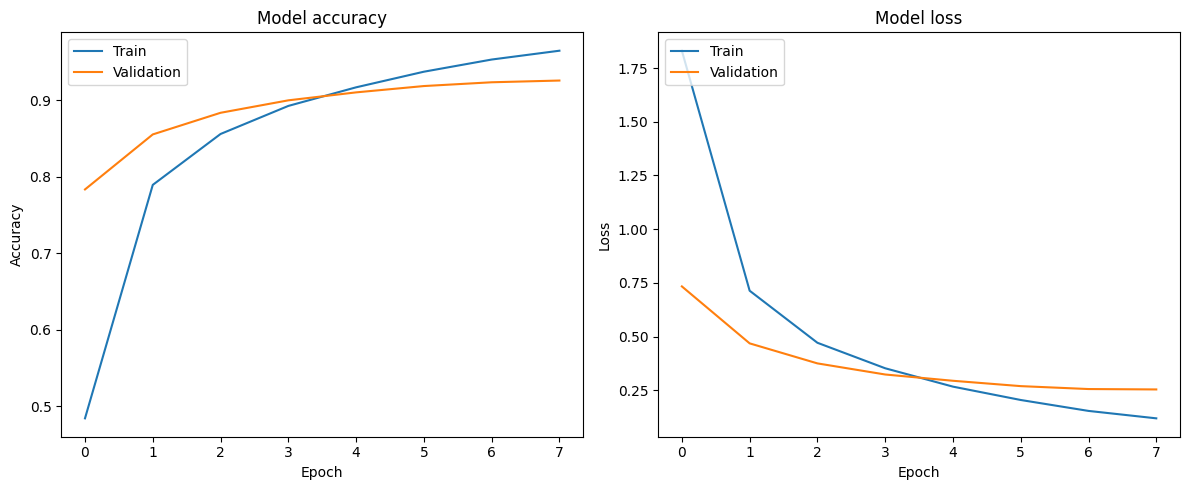

In [34]:
plot_graph(mobilenet_history)


# Inception

In [42]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

# Load the pre-trained InceptionV3 model without the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 250  
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
inception_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  
])

# Compile the model
inception_model.compile(optimizer=RMSprop(learning_rate=1e-5),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Summary of the model architecture
inception_model.summary()

# Train the model
inception_history = inception_model.fit(normalized_train_ds,
                              epochs=8,
                              validation_data=normalized_val_ds)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 10,541,440 (40.21 MB)

 Non-trainable params: 11,261,344 (42.96 MB)

Epoch 1/8
  3/938 ━━━━━━━━━━━━━━━━━━━━ 59s 63ms/step - accuracy: 0.0243 - loss: 3.4145       

W0000 00:00:1716448405.918798     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.1800 - loss: 2.9104

W0000 00:00:1716448492.634429     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716448499.258039     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 175s 126ms/step - accuracy: 0.1801 - loss: 2.9100 - val_accuracy: 0.6112 - val_loss: 1.5799
Epoch 2/8


W0000 00:00:1716448524.159426     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 93ms/step - accuracy: 0.5477 - loss: 1.6446 - val_accuracy: 0.7269 - val_loss: 1.0180
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.6699 - loss: 1.1511 - val_accuracy: 0.7655 - val_loss: 0.8000
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.7424 - loss: 0.9005 - val_accuracy: 0.7893 - val_loss: 0.6942
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.7813 - loss: 0.7450 - val_accuracy: 0.8069 - val_loss: 0.6262
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.8124 - loss: 0.6338 - val_accuracy: 0.8199 - val_loss: 0.5789
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 88s 93ms/step - accuracy: 0.8417 - loss: 0.5419 - val_accuracy: 0.8283 - val_loss: 0.5456
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 87s 92ms/step - accuracy: 0.8645 - loss: 0.4592 - val_accuracy: 0.8364 - val_loss: 0.5201


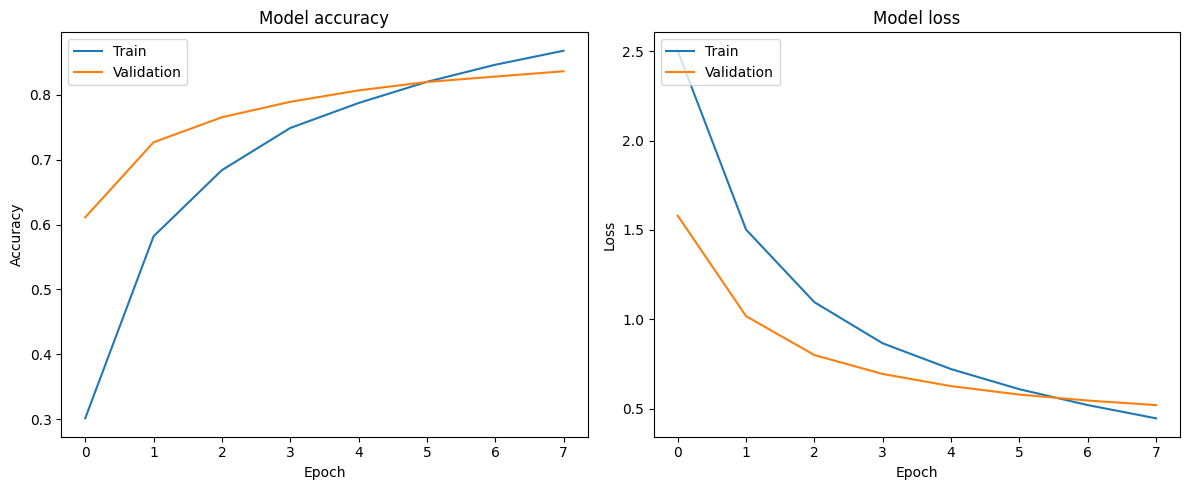

In [49]:
plot_graph(inception_history)

# DenseNet121

In [43]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

# Load the pre-trained DenseNet121 model without the top layers
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Fine-tuning: Unfreeze some layers of the base model
fine_tune_at = 250  # Example, you can adjust this value
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Add custom layers on top of the base model
densenet_model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  
])

# Compile the model
densenet_model.compile(optimizer=RMSprop(learning_rate=1e-5),
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Summary of the model architecture
densenet_model.summary()

# Train the model
history = densenet_model.fit(normalized_train_ds,
                             epochs=8,
                             validation_data=normalized_val_ds)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ densenet121 (Functional)        │ ?                      │     7,037,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_8      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,037,504 (26.85 MB)

 Trainable params: 3,935,488 (15.01 MB)

 Non-trainable params: 3,102,016 (11.83 MB)

Epoch 1/8
  2/938 ━━━━━━━━━━━━━━━━━━━━ 1:38 105ms/step - accuracy: 0.0391 - loss: 4.7220  

W0000 00:00:1716449312.852582     114 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.1137 - loss: 3.5203

W0000 00:00:1716449424.255690     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1716449434.742524     113 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 219s 161ms/step - accuracy: 0.1138 - loss: 3.5196 - val_accuracy: 0.6427 - val_loss: 1.5225
Epoch 2/8


W0000 00:00:1716449463.843491     112 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 97ms/step - accuracy: 0.5285 - loss: 1.6672 - val_accuracy: 0.8083 - val_loss: 0.7951
Epoch 3/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 142s 97ms/step - accuracy: 0.7131 - loss: 1.0159 - val_accuracy: 0.8609 - val_loss: 0.5313
Epoch 4/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 97ms/step - accuracy: 0.7884 - loss: 0.7339 - val_accuracy: 0.8872 - val_loss: 0.4126
Epoch 5/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 97ms/step - accuracy: 0.8339 - loss: 0.5733 - val_accuracy: 0.9003 - val_loss: 0.3483
Epoch 6/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 96ms/step - accuracy: 0.8574 - loss: 0.4825 - val_accuracy: 0.9109 - val_loss: 0.3041
Epoch 7/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 97ms/step - accuracy: 0.8871 - loss: 0.3943 - val_accuracy: 0.9192 - val_loss: 0.2735
Epoch 8/8
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 97ms/step - accuracy: 0.8992 - loss: 0.3438 - val_accuracy: 0.9251 - val_loss: 0.2493


In [47]:
densenet_model.fit(normalized_train_ds,
                              epochs=12,  # Total number of epochs (8 previous + 4 new)
                              initial_epoch=8,  # Starting from epoch 8
                              validation_data=normalized_val_ds)

Epoch 9/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 97ms/step - accuracy: 0.9282 - loss: 0.2456 - val_accuracy: 0.9351 - val_loss: 0.2157
Epoch 11/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 97ms/step - accuracy: 0.9383 - loss: 0.2109 - val_accuracy: 0.9387 - val_loss: 0.2031
Epoch 12/12
938/938 ━━━━━━━━━━━━━━━━━━━━ 91s 97ms/step - accuracy: 0.9462 - loss: 0.1848 - val_accuracy: 0.9433 - val_loss: 0.1928


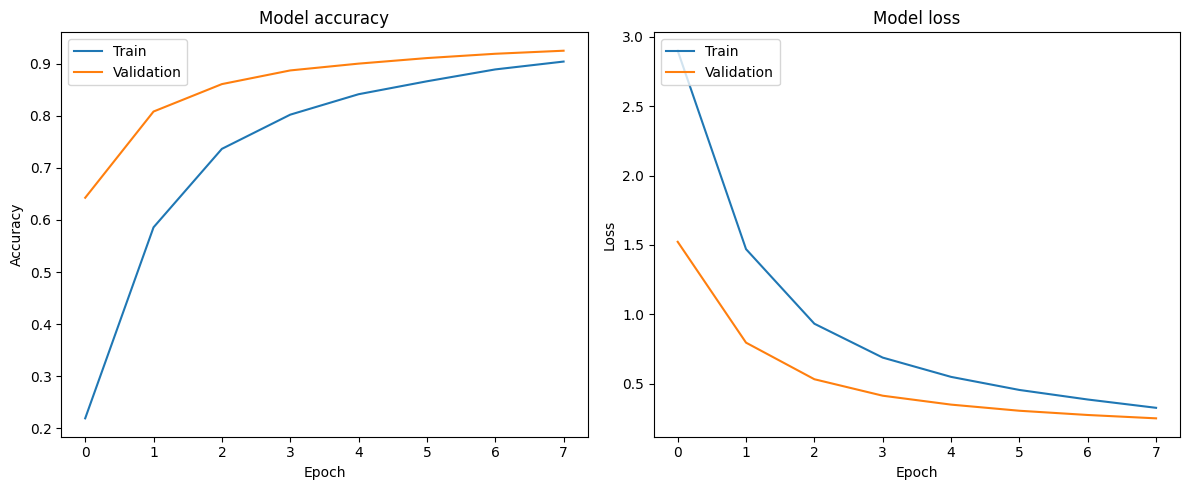

In [48]:
plot_graph(history)

# Conclusion

## Overall Best Model
**DenseNet** outperformed all other models in terms of both training and validation accuracy, achieving a validation accuracy of 94.33% and a validation loss of 0.1928 by the end of 12 epochs. This suggests that DenseNet generalizes well to the validation set.

## Close Second
**MobileNet** also performed exceptionally well, with a validation accuracy of 92.55% and a validation loss of 0.2536. It shows strong performance but is slightly behind DenseNet.

## Other Notable Performances
- **VGG** achieved a validation accuracy of 81.59% and a validation loss of 0.5987. It showed good performance but not as high as DenseNet or MobileNet.
- **Inception** showed a reasonable performance with a validation accuracy of 83.64% and a validation loss of 0.5201.

## Underperforming Models
- **ResNet** and **CNN** did not perform as well as the others, with ResNet showing the lowest validation accuracy at 41.09% and a high validation loss of 1.9183. CNN had a decent training accuracy but struggled with validation, indicating potential overfitting or an inability to generalize well to new data.



# Recommendation
Based on the provided performance metrics,  **DenseNet model** is the perfect for this classification problem. . MobileNet is also a strong candidate if you are looking for a lightweight model with high performance.






